In [1]:
# Aprendizado não supervisionado
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
dados = pd.DataFrame({
    'Máquina': ['M1','M2','M3','M4','M5','M6','M7','M8','M9','M10'],
    'Temporada': [70.2,65.1,75.5,80.3,68.7,72.9,78.6,66.4,73.1,69.5],
    'Vibração': [12.5,8.2,15.6,10.2,11.8,14.3,9.8,8.9,13.7,12.1],
    'Corrente': [4.7,3.9,5.1,4.5,4.2,5.3,4.8,4.0,5.0,4.3]
})
dados.head()

,Máquina,Temporada,Vibração,Corrente
0,M1,70.2,12.5,4.7
1,M2,65.1,8.2,3.9
2,M3,75.5,15.6,5.1
3,M4,80.3,10.2,4.5
4,M5,68.7,11.8,4.2


In [4]:
dados_ativos = pd.get_dummies(dados, columns=['Máquina'], drop_first=True)
dados_ativos

,Temporada,Vibração,Corrente,Máquina_M10,Máquina_M2,Máquina_M3,Máquina_M4,Máquina_M5,Máquina_M6,Máquina_M7,Máquina_M8,Máquina_M9
0,70.2,12.5,4.7,False,False,False,False,False,False,False,False,False
1,65.1,8.2,3.9,False,True,False,False,False,False,False,False,False
2,75.5,15.6,5.1,False,False,True,False,False,False,False,False,False
3,80.3,10.2,4.5,False,False,False,True,False,False,False,False,False
4,68.7,11.8,4.2,False,False,False,False,True,False,False,False,False
5,72.9,14.3,5.3,False,False,False,False,False,True,False,False,False
6,78.6,9.8,4.8,False,False,False,False,False,False,True,False,False
7,66.4,8.9,4.0,False,False,False,False,False,False,False,True,False
8,73.1,13.7,5.0,False,False,False,False,False,False,False,False,True
9,69.5,12.1,4.3,True,False,False,False,False,False,False,False,False


In [5]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(dados_ativos)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [6]:
sse = kmeans.inertia_
print(sse)

15.631666666666685


Text(0.5, 0, 'Vibração')

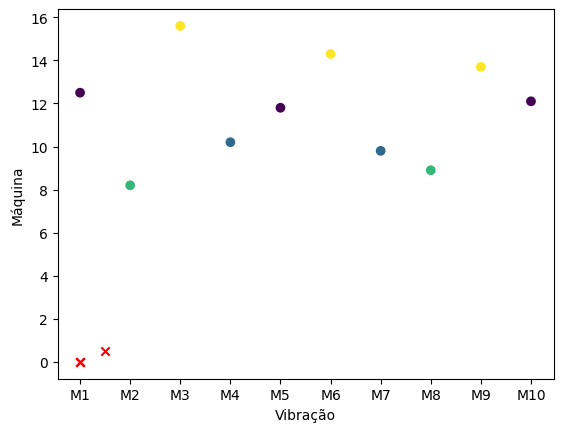

In [7]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.scatter(dados['Máquina'], dados['Vibração'], c=labels)
plt.scatter(centroids[:,4], centroids[:,4], marker='x', color='red')
plt.ylabel('Máquina')
plt.xlabel('Vibração')

In [8]:
dados_ativos['Grupo'] = labels
grouped_data = dados_ativos.groupby('Grupo').mean()
print(grouped_data)

       Temporada   Vibração  Corrente  Máquina_M10  Máquina_M2  Máquina_M3  \
Grupo                                                                        
0      69.466667  12.133333  4.400000     0.333333         0.0    0.000000   
1      79.450000  10.000000  4.650000     0.000000         0.0    0.000000   
2      65.750000   8.550000  3.950000     0.000000         0.5    0.000000   
3      73.833333  14.533333  5.133333     0.000000         0.0    0.333333   

       Máquina_M4  Máquina_M5  Máquina_M6  Máquina_M7  Máquina_M8  Máquina_M9  
Grupo                                                                          
0             0.0    0.333333    0.000000         0.0         0.0    0.000000  
1             0.5    0.000000    0.000000         0.5         0.0    0.000000  
2             0.0    0.000000    0.000000         0.0         0.5    0.000000  
3             0.0    0.000000    0.333333         0.0         0.0    0.333333  
